[Plots.jl] Switched to backend: gadfly

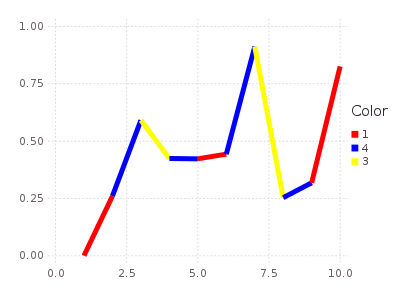

In [5]:
using Plots; gadfly(); default(size=(400,300),leg=false)
n = 10
#cs = distinguishable_colors(n)
cs = [colorant"red",colorant"blue",colorant"yellow",colorant"blue"]
#cs = vec(repmat(cs2,round(Int,n/length(cs2)),1))
plot(rand(n), c=Any[cs], w=5)

In [ ]:
using Gadfly
xs = linspace(0,8π,100); ys = map(sin,xs); cs = rand(length(xs))
#plot(x=xs, y=ys, color=cs, Geom.path)
plot(x=vcat(xs,xs[2:end]), y=vcat(ys,ys[2:end]), color=vcat(cs,cs[1:end-1]), Geom.line)

In [1]:
using Plots; qwt()
default(:size, (500,300));

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: qwt


In [5]:
# a couple things are happening here... we're pushing new 
# data to our series, and redrawing with gui()
function add_to_plot(plt, rng)
    for x in rng
        push!(plt, x, [randn(), sin(x)])
    end
    gui()
end

function run_push_test(batchsize, numbatch)
    fullrng = linspace(0.2, 2π, numbatch+1)
    println("Testing batchsize=$batchsize numbatch=$numbatch points")
    plt = plot([0,0.1], Any[randn(2),sin], t=[:sticks,:path], w=2)
    
    allms = Float64[]
    for i in 1:numbatch
        rng = linspace(fullrng[i], fullrng[i+1], batchsize)
        t = @elapsed add_to_plot(plt, rng)
        millis = 1000*t
        push!(allms, millis)
        # @printf "Millis per update: %1.3f\n" millis
    end
    allms
end

run_push_test (generic function with 1 method)

In [8]:
batchsize, numbatch = 500, 500
ms = run_push_test(batchsize, numbatch);

Testing batchsize=500 numbatch=500 points


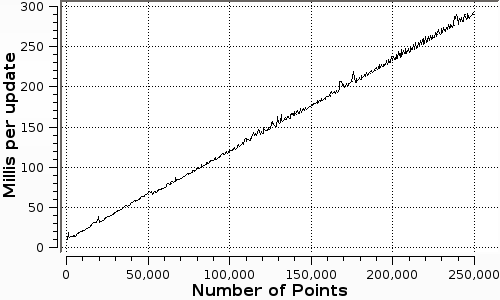

In [9]:
plot((1:numbatch)*batchsize, ms, xlab="Number of Points", ylab="Millis per update", leg=false)

## Example: add to a plot different ways

In [ ]:
plt = plot(rand(10,2))

In [ ]:
# append 3 points to the second series
append!(plt, 2,rand(3))

In [ ]:
# pushing a vector will add one to each series
for i in 1:100
    push!(plt, rand(2))
end
plt

## Example: line styles 

[Plots.jl] Switched to backend: pyplot

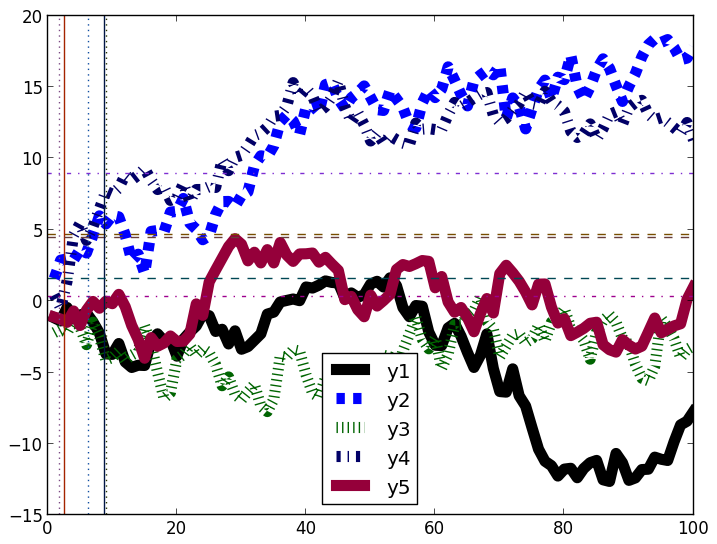


[Plots.jl] Initializing backend: pyplot


In [2]:
using Plots; pyplot()
plot(cumsum(randn(100,5),1), w=8, style=:auto)
plot!(rand(1,10)*10, style=:auto, t=[:hline,:vline])

In [ ]:
using Plots
plot(rand(10))
png("tmp")  # saves as "tmp.png"
png("tmp.png") # saves as "tmp.png"
savefig("tmp") # error... can't extract extension
savefig("tmp.png")  # saves as "tmp.png"

[Plots.jl] Switched to backend: gadfly

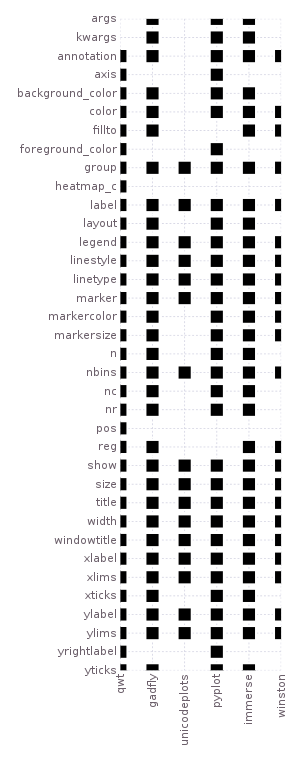

In [9]:
# create a "support graph" for which args are supported by each backend
using Plots; gadfly()

function supportGraph(allvals, func)
    vals = reverse(allvals)
    x = ASCIIString[]
    y = ASCIIString[]
    for b in backends()
        supported = func(Plots.backendInstance(b))
        for val in vals
            if val in supported
                push!(x, string(b))
                push!(y, string(val))
            end
        end 
    end
    scatter(x,y, m=:rect, ms=10, size=(300,100+18*length(vals)), leg=false)
end

supportGraph(Plots._allArgs, supportedArgs)

In [1]:
map(i->println(join(["FIZZ","BUZZ",i][i%[3,5,1].==0][1:max(1,end-1)])),1:100);

1
2
FIZZ
4
BUZZ
FIZZ
7
8
FIZZ
BUZZ
11
FIZZ
13
14
FIZZBUZZ
16
17
FIZZ
19
BUZZ
FIZZ
22
23
FIZZ
BUZZ
26
FIZZ
28
29
FIZZBUZZ
31
32
FIZZ
34
BUZZ
FIZZ
37
38
FIZZ
BUZZ
41
FIZZ
43
44
FIZZBUZZ
46
47
FIZZ
49
BUZZ
FIZZ
52
53
FIZZ
BUZZ
56
FIZZ
58
59
FIZZBUZZ
61
62
FIZZ
64
BUZZ
FIZZ
67
68
FIZZ
BUZZ
71
FIZZ
73
74
FIZZBUZZ
76
77
FIZZ
79
BUZZ
FIZZ
82
83
FIZZ
BUZZ
86
FIZZ
88
89
FIZZBUZZ
91
92
FIZZ
94
BUZZ
FIZZ
97
98
FIZZ
BUZZ


[Plots.jl] Initializing backend: pyplot

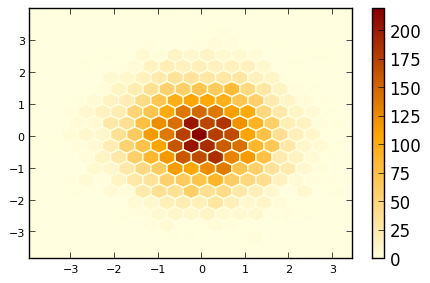

In [1]:
using Plots; pyplot(); default(size=(500,300))
p = heatmap(randn(10000),randn(10000), nbins=20, c=:heat)

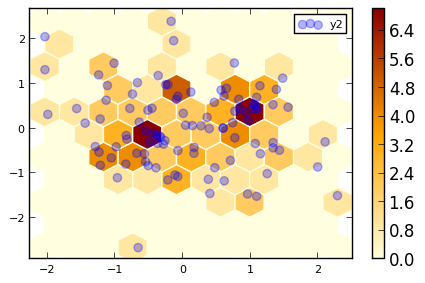

In [8]:
using Plots; pyplot(); default(size=(500,300))
x, y = randn(100), randn(100)
plot([x x], [y y], l=([:hexbin :scatter], [:heat RGBA(0,0,1,0.3)]), nbins=10)

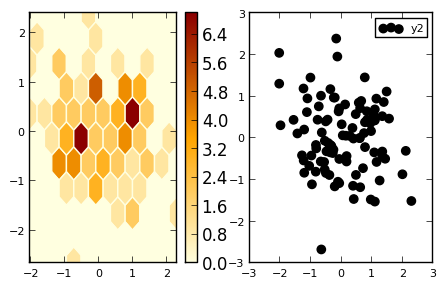

In [9]:
subplot([x x], [y y], l=([:hexbin :scatter], [:heat :black]), nbins=10, n=2)

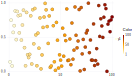

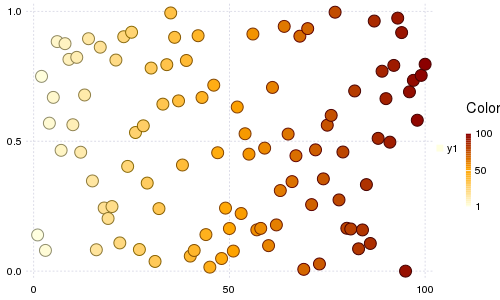

In [5]:
scatter(rand(100), z=1:100, c=:heat)